## Tarea 2, parte 1
### Esteban Jiménez Henríquez

** Acerca de Kepler**

Kepler es un instrumento ubicado en el espacio cuyo objetivo es la búsqueda de sistemas planetarios. Específicamente, se trata de encontrar planetas parecidos a la Tierra y que se encuentren dentro de la zona habitable. [NASA](http://kepler.nasa.gov/Mission/QuickGuide/)

KOI y KIC son los acrónimos de Kepler Object of Interest y Kepler Input Catalog.

La misión K2 fue lanzada debido a una falla en mecánica en Kepler. 
Su objetivo es el mismo que el de su predecesor y el catálogo donde se encuentran sus targets es el Ecliptic Plane Input Catalogue (EPIC).

Usando el módulo kplr para extraer los datos, podemos escoger entre dos tipos de fotometría: Simple Aperture Photometry (SAP) y Pre-search Data Conditioning SAP (PDCSAP). El primero corresponde a la fotometría realizada por kepler defiendo radios de apertura, y el segundo corresponde a una correción de los errores sistemáticos presentes en el método SAP. 

### KIC 2305930, KIC 43485593, KIC 9469165 y RRab (KIC 6100702)

Extraemos las curvas de luz para cada estrella usando el módulo kplr

In [1]:
import numpy as np
import kplr
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
client = kplr.API()

In [2]:
star1 = client.star(2305930) # KIC 2305930
star2 = client.star(4348593) # KIC 4348593
star3 = client.star(9469165) # KIC 9469165 
star4 = client.star(6100702) # RR Lyr
lcs_1 = star1.get_light_curves(short_cadence=False)
lcs_2 = star2.get_light_curves(short_cadence=False)
lcs_3 = star3.get_light_curves(short_cadence=False)
lcs_4 = star4.get_light_curves(short_cadence=False)
star_names = ['KIC 2305930', 'KIC 4348593','KIC 9469165','KIC 6100702']

Extraemos los parámetros estelares dados por el KIC:

In [3]:
f1, f2, f3, f4 = (lcs_1[0]).open(), (lcs_2[0]).open(), (lcs_3[0]).open(), (lcs_4[0]).open()
f = [f1,f2,f3,f4]
for i, j in zip(star_names, f):
    print i
    print 'LOGG: %.3f \t TEFF: %i \t FEH: %.2f ' % (j[0].header['LOGG'],j[0].header['TEFF'],j[0].header['FEH'])
    print '============================================'

f1.close()
f2.close()
f3.close()                                                     
f4.close()                                                    

KIC 2305930
LOGG: 2.367 	 TEFF: 4891 	 FEH: -0.69 
KIC 4348593
LOGG: 2.701 	 TEFF: 5065 	 FEH: 0.04 
KIC 9469165
LOGG: 2.374 	 TEFF: 4997 	 FEH: -0.78 
KIC 6100702
LOGG: 4.065 	 TEFF: 7009 	 FEH: -0.18 


In [4]:
def extract (inf_star):
    time, flux, ferr = [], [], []
    for lc in inf_star:
        with lc.open() as f:
            hdu_data = f[1].data
            time.append(hdu_data["time"])
            flux.append(hdu_data["pdcsap_flux"])
            ferr.append(hdu_data["pdcsap_flux_err"]) 
    return time,flux,ferr    

def plot (x_arr,y_arr,axis,star_name):
    for i,j in zip(x_arr,y_arr):
        axis.plot(i,j,'b.')
    axis.set_title(star_name, size = 14)
    axis.set_xlabel('Time (days)', size =12)
    axis.set_ylabel('Flux', size = 12)

In [5]:
# Extraemos los tiempos y los flujos con sus errores.
time1, flux1, ferr1 = extract(lcs_1)
time2, flux2, ferr2 = extract(lcs_2)
time3, flux3, ferr3 = extract(lcs_3)
time4, flux4, ferr4 = extract(lcs_4)

times = [time1, time2 ,time3, time4]
fluxes = [flux1, flux2, flux3, flux4]
ferr = [ferr1,ferr2,ferr3, ferr4]
del(time1,flux1,time2,flux2,time3,flux3,time4,flux4,ferr4)

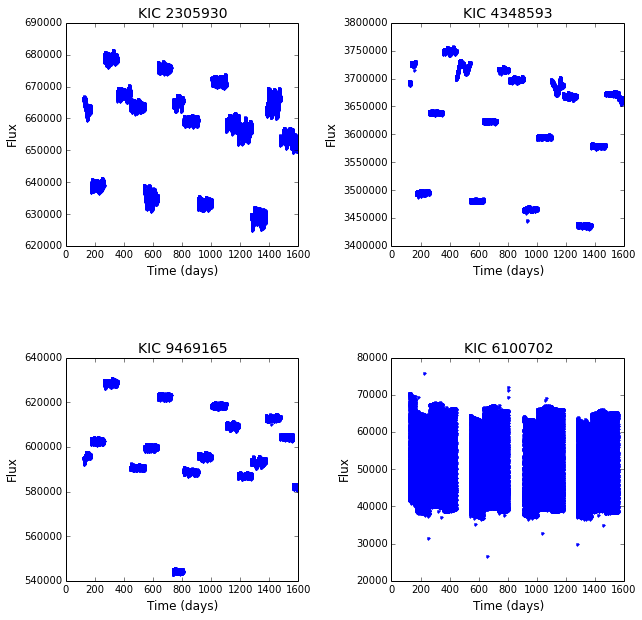

In [6]:
# Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
axis = [ax1,ax2,ax3,ax4]
plt.subplots_adjust(hspace= 0.5, wspace = 0.4)

for i,j,k,l in zip(times, fluxes, axis, star_names):
    plot(i,j,k,l)

In [7]:
# Borramos los nans de todas las listas.
for i, j, k in itertools.izip(times, fluxes, ferr):
    
    for m in range(len(i)):
        
        t1, t2, t3 = i[m], j[m], k[m]
        mask = np.array([not l for l in np.isnan(t1)])
        t1, t2, t3 = t1[mask], t2[mask], t3[mask]
        mask = np.array([not l for l in np.isnan(t2)])
        t1, t2, t3 = t1[mask], t2[mask], t3[mask]
        mask = np.array([not l for l in np.isnan(t3)])
        t1, t2, t3 = t1[mask], t2[mask], t3[mask]
        i[m], j[m], k[m] = t1, t2, t3
    

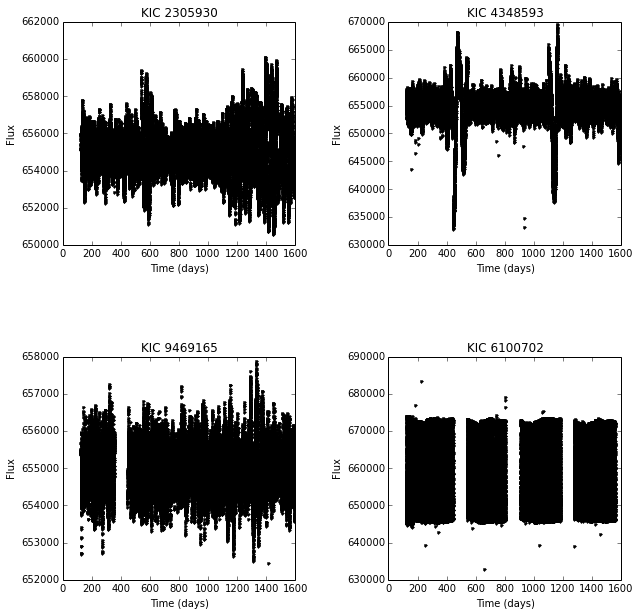

In [8]:
# Unimos los quartos usa
fl = 6.55e5 # Valor de flujo al cual se ajustará la mediana
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(hspace= 0.5, wspace = 0.4)

for i,j in zip(times[0], fluxes[0]):
    med = np.median(j)
    offy = fl - med # offset
    j += offy # movemos los puntos de acuerdo al offset
    ax1.plot(i,j,'k.')
    ax1.set_xlabel('Time (days)')
    ax1.set_ylabel('Flux')
    ax1.set_title(star_names[0])
    
for i,j in zip(times[1], fluxes[1]):
    med = np.median(j)
    offy = fl - med
    j += offy
    ax2.plot(i,j,'k.')
    ax2.set_xlabel('Time (days)')
    ax2.set_ylabel('Flux')
    ax2.set_title(star_names[1])
    
for i,j in zip(times[2], fluxes[2]):
    med = np.median(j)
    offy = fl - med
    j += offy
    ax3.plot(i,j,'k.')
    ax3.set_xlabel('Time (days)')
    ax3.set_ylabel('Flux')
    ax3.set_title(star_names[2])
        
for i,j in zip(times[3], fluxes[3]):
    med = np.median(j)
    offy = fl - med
    j += offy
    ax4.plot(i,j,'k.')
    ax4.set_xlabel('Time (days)')
    ax4.set_ylabel('Flux')
    ax4.set_title(star_names[3])
        